# Working With Arbin Data

In [1]:
from primed_data_processing.cellbuilder import CellBuilder
from primed_data_processing.arbin_cycler import ArbinCell, ArbinCycle, ArbinStep

In [2]:
cell_builder = CellBuilder()
# instantiate a ArbinCell object
cell = ArbinCell(cell_number=1, channel_number=1)
local_datapath = '../test/cycler_testing_data/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16_Channel_1.1.csv'

# select the steps that we want to load
# we select the characterization discharge and degradation CC discharge steps
steps = {
    'characterization': [6,7,10],
    'degradation': [29]
}

# use a method in cell_builder to process the data for us and store in cell.
cell_builder.read_B6_csv_data(cell=cell, file_path=local_datapath, steps=steps)

In [3]:
for cycle in cell:
    if cycle.cycle_index == 1:
        for step in cycle:
            if step.step_index == 10:
                step.get_data_as_dataframe()

In [4]:
cell.cycles[0].get_step(10)[0].get_data_as_dataframe()

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm),dV/dt(V/s),Battery_Temperature(C)
0,10/23/2021 01:03:59.079,38449.2489,5.0013,10.0,1.0,4.156273,-1.391853,3.218330e-09,0.001920,1.348050e-08,0.007989,,0.0,-0.001279,18.678576
1,10/23/2021 01:04:04.079,38454.2486,10.0010,10.0,1.0,4.151501,-1.391792,3.218330e-09,0.003853,1.348050e-08,0.016019,,0.0,-0.000856,18.697382
2,10/23/2021 01:04:09.079,38459.2485,15.0009,10.0,1.0,4.148088,-1.389793,3.218330e-09,0.005780,1.348050e-08,0.024011,,0.0,-0.000664,18.680519
3,10/23/2021 01:04:14.079,38464.2487,20.0011,10.0,1.0,4.145059,-1.389801,3.218330e-09,0.007712,1.348050e-08,0.032025,,0.0,-0.000587,18.709468
4,10/23/2021 01:04:19.078,38469.2478,25.0002,10.0,1.0,4.142507,-1.389542,3.218330e-09,0.009643,1.348050e-08,0.040024,,0.0,-0.000484,18.698135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,10/23/2021 03:54:24.080,48674.2497,10230.0021,10.0,1.0,2.549133,-1.386734,3.218330e-09,3.951413,1.348050e-08,14.536233,,0.0,-0.002725,20.031925
2046,10/23/2021 03:54:29.078,48679.2483,10235.0007,10.0,1.0,2.535239,-1.386719,3.218330e-09,3.953342,1.348050e-08,14.541136,,0.0,-0.002894,19.992480
2047,10/23/2021 03:54:34.078,48684.2484,10240.0008,10.0,1.0,2.521005,-1.386993,3.218330e-09,3.955268,1.348050e-08,14.546006,,0.0,-0.002891,20.049487
2048,10/23/2021 03:54:39.079,48689.2489,10245.0013,10.0,1.0,2.506514,-1.386551,3.218330e-09,3.957193,1.348050e-08,14.550844,,0.0,-0.003014,20.043951


In [5]:
cell.headers

['Date_Time',
 'Test_Time(s)',
 'Step_Time(s)',
 'Step_Index',
 'Cycle_Index',
 'Voltage(V)',
 'Current(A)',
 'Charge_Capacity(Ah)',
 'Discharge_Capacity(Ah)',
 'Charge_Energy(Wh)',
 'Discharge_Energy(Wh)',
 'ACR(Ohm)',
 'Internal Resistance(Ohm)',
 'dV/dt(V/s)',
 'Battery_Temperature(C)']

In [6]:
cell.cycles[0].get_step(10)[0].data_dict.keys()

dict_keys(['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'ACR(Ohm)', 'Internal Resistance(Ohm)', 'dV/dt(V/s)', 'Battery_Temperature(C)'])

In [7]:
# Get step
step = cell.cycles[0].get_step(10)[0]

# Get voltage data from the step
step['Voltage(V)']

[4.156272888,
 4.151501179,
 4.148087502,
 4.145059109,
 4.142507076,
 4.14019537,
 4.138084888,
 4.136105061,
 4.134222984,
 4.132522106,
 4.130731106,
 4.129123688,
 4.127518177,
 4.126031876,
 4.124472618,
 4.123083591,
 4.121719837,
 4.12029171,
 4.118975639,
 4.117722511,
 4.116325855,
 4.115166664,
 4.113944054,
 4.112816334,
 4.11156559,
 4.110420704,
 4.109343529,
 4.108216286,
 4.107132435,
 4.106079578,
 4.105064869,
 4.103950024,
 4.103051186,
 4.102077484,
 4.101069927,
 4.100158215,
 4.099230289,
 4.098306656,
 4.097372532,
 4.096534729,
 4.095593452,
 4.094773769,
 4.093954086,
 4.093096256,
 4.092220306,
 4.091451645,
 4.090646744,
 4.089907646,
 4.089114189,
 4.088437557,
 4.087695599,
 4.086965084,
 4.086224556,
 4.085508823,
 4.084852695,
 4.084169865,
 4.083516598,
 4.08291626,
 4.082231522,
 4.081511497,
 4.080910206,
 4.080321789,
 4.079650402,
 4.07904911,
 4.07853508,
 4.077943325,
 4.077352524,
 4.07677269,
 4.076258183,
 4.075713158,
 4.075139523,
 4.074572086,

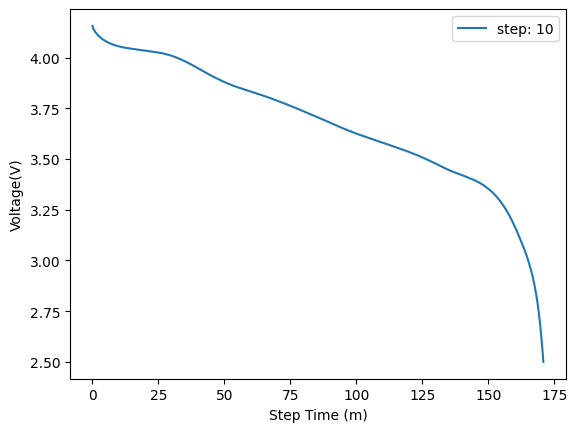

In [8]:
# Get step
step = cell.cycles[0].get_step(10)[0]

# Plot voltage
step.plot_step_column('Voltage(V)')

# Working With Gamry EIS Data

In [2]:
from primed_data_processing.gamry_eis import EisSweep, EisCycle, EisCell

In [10]:
path = '../test/eis_testing_data/B6T10V0_Chan001_Cycle001_Step014.DTA'

# Make EisSweep object to store the data
# from the Arbin data we know that eis steps happen at 50% soc
eis_sweep = EisSweep(name='eis cycle 1', soc=0.5, step_index=14)

# import the data
eis_sweep.read_DTA_file(path)

In [11]:
# Make an EisCycle object
cycle = EisCycle(cycle_number=1, sweeps=[eis_sweep], name='cycle1')

# Make an EisCell object
cell = EisCell(cell_number=1, channel_number=1, name='cell1', eis_cycles=[cycle])

In [12]:
cell.cycles[0].sweeps[0].get_data_as_dataframe()

,Pt (#),Time (s),Freq (Hz),Zreal (ohm),Zimag (ohm),Zsig (V),Zmod (ohm),Zphz (°),Idc (A),Vdc (V),IERange (#)
0,0.0,1.0,100019.500000,0.022929,-0.003015,1.0,0.023126,-7.490437,0.001803,3.760538,12.0
1,1.0,2.0,46464.840000,0.016203,0.002288,1.0,0.016363,8.036185,0.001951,3.760587,12.0
2,2.0,4.0,21621.090000,0.011836,0.003414,1.0,0.012318,16.089130,0.002016,3.760552,12.0
3,3.0,5.0,10019.530000,0.009341,0.002339,1.0,0.009630,14.056530,0.002021,3.760539,12.0
4,4.0,6.0,4630.335000,0.008478,0.000889,1.0,0.008525,5.983749,0.001609,3.760588,12.0
5,5.0,7.0,2141.204000,0.008506,-0.000196,1.0,0.008508,-1.319530,0.001595,3.760565,12.0
6,6.0,9.0,1000.702000,0.008964,-0.000927,1.0,0.009012,-5.903959,0.001618,3.760558,12.0
7,7.0,10.0,463.598900,0.009702,-0.001413,1.0,0.009805,-8.286180,0.001579,3.760599,12.0
8,8.0,11.0,215.022900,0.010635,-0.001657,1.0,0.010764,-8.854591,0.001584,3.760582,12.0
9,9.0,12.0,99.734000,0.011626,-0.001620,1.0,0.011739,-7.933879,0.001555,3.760585,12.0


# Advanced Data Importing

In [3]:
import os

In [7]:
# instantiate CellBuilder
cell_builder = CellBuilder()

# raws_prepath = 'path/to/raws/'
raws_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/'

# all channel and cell numbers from B6 in order
channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)

# list for holding processed cells
arbin_cells = []

# loop over channel numbers
for channel_idx, channel in enumerate(channel_numbers):
    print(f'Processing channel {channel}')

    # make subfolder name in raws folder
    folder_name = f'B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/Channel_{channel}/'

    # append new cell to cells processed cells list
    arbin_cells.append(ArbinCell(cell_numbers[channel_idx], channel))

    # get directory of the current folder
    directory = os.fsencode(raws_prepath+folder_name)

    # loop over all files in the current directory
    for file in os.listdir(directory):
        # get filename
        filename = os.fsdecode(file)

        # ignore .xlsx files
        if filename.endswith('.csv'):
            # process file with CellBuilder method
            cell_builder.read_B6_csv_data(
                arbin_cells[channel_idx], # current cell being processed
                raws_prepath+folder_name+filename, # path to file being processed
                {'characterization': [10,13,14]}, # steps to save
                verbose=False # minimal printouts
            )

Processing channel 1
Processing channel 2
Processing channel 3
Processing channel 4
Processing channel 9
Processing channel 10
Processing channel 11
Processing channel 12
Processing channel 13
Processing channel 14
Processing channel 15
Processing channel 16


In [18]:
# Load eis into objects
file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'

# all channel and cell numbers from B6 in order
channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)

# list for holding processed cells
eis_cells = []

# loop over all channels in the batch
for channel_idx, channel in enumerate(channel_numbers):
    # initial cycle number
    cycle = 1

    # list for storying processed cycles
    eis_cycles = []

    # loop until cycle number 23.
    while cycle <= 23:

        # make a new EisSweep for every cycle (only 1 sweep per cycle in this case)
        eis_sweep = EisSweep(f'eis cycle{cycle}', 0.5, 14)

        # handle different file and cycle combinations in the .DTA filename.
        if cycle < 10 and channel < 10:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA')
        elif cycle < 10 and channel < 100:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle00{cycle}_Step014.DTA')
        elif cycle < 100 and channel < 10:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle0{cycle}_Step014.DTA')
        elif cycle < 100 and channel < 100:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle0{cycle}_Step014.DTA')
        else:
            print('Cycle number greater than 100!')

        # add a new EisCycle to the cycles list for every cycle
        eis_cycles.append(EisCycle(cycle, [eis_sweep], f'cycle_object_{cycle}'))
        cycle += 2
        
        
    # make the EisCell object with all of the processed data
    eis_cells.append(EisCell(
        name=f'eis step for channel{channel}', 
        eis_cycles=eis_cycles, 
        cell_number=cell_numbers[channel_idx], 
        channel_number=channel)
        )
    # reset the cycles list for the new cell.
    eis_cycles = []

In [15]:
cell_builder.merge_B6_eis_data(eis_cells, arbin_cells)

In [16]:
max_new_capacity = 4 #Ah
for cell in arbin_cells:
    for cycle in cell:
        if cycle.get_step(10) and cycle.get_step(13) and cycle.get_eis_step(14):
            print(f'Step SOH: {cycle.get_step(10)[0]["Discharge_Capacity(Ah)"][-1]/max_new_capacity}')
            print(f'Step Battery Temperature: {cycle.get_step(13)[0]["Battery_Temperature(C)"][-1]}')
            print(f'Step EIS start frequency: {cycle.get_eis_step(14)[0].freq[0]}')

Step SOH: 0.98951172825
Step Battery Temperature: 18.74851227
Step EIS start frequency: 100019.5
Step SOH: 0.969012618
Step Battery Temperature: 18.66194916
Step EIS start frequency: 100019.5
Step SOH: 0.95717233425
Step Battery Temperature: 21.62377739
Step EIS start frequency: 100019.5
Step SOH: 0.94492048025
Step Battery Temperature: 21.47348785
Step EIS start frequency: 100019.5
Step SOH: 0.93622279175
Step Battery Temperature: 21.57527924
Step EIS start frequency: 100019.5
Step SOH: 0.92814069975
Step Battery Temperature: 21.60574532
Step EIS start frequency: 100019.5
Step SOH: 0.92036908875
Step Battery Temperature: 21.61019897
Step EIS start frequency: 100019.5
Step SOH: 0.904498756
Step Battery Temperature: 21.66473961
Step EIS start frequency: 100019.5
Step SOH: 0.9019761085
Step Battery Temperature: 21.64170265
Step EIS start frequency: 100019.5
Step SOH: 0.89721959825
Step Battery Temperature: 30.69124847
Step EIS start frequency: 100019.5
Step SOH: 0.88930886975
Step Batter